In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.simplefilter("ignore")

- trn_X_20231211_final_col_01_transformed.csv, trn_y_20231211_final_col_01_transformed.csv 데이터 셋을 사용

In [2]:
X_trn = pd.read_csv("/home/sangjun/work/temp/trn_X_20231211_final_col_01_transformed.csv")
X_origin = X_trn.copy()
y_trn = pd.read_csv("/home/sangjun/work/temp/trn_y_20231211_final_col_01_transformed.csv")

사용할 feature

In [3]:
num_features = ['HE_chol', 'HE_Bplt', 'HE_wt', 'HE_ht', 'HE_RBC', 'HE_HDL_st2', 'HE_HB', 'age', 'HE_Uph', 'HE_crea', 'HE_Usg', 'HE_WBC', 'HE_TG', 'HE_alt', 'HE_ast',
 'HE_HCT', 'HE_dbp', 'HE_glu', 'HE_BUN', 'ainc', 'HE_sbp', 'HE_wc']
onehot_features = ['BO2_1', 'educ', 'BH1', 'EC_stt_2', 'sex', 'HE_Unitr', 'LQ4_00', 'DI1_pt', 'BM1_5', 'DE1_pt', 'DJ4_pt', 'HE_Ubld', 'LQ1_sb', 'BM1_8', 'occp', 'DI2_pr',
 'BD1', 'marri_1', 'DI3_pr', 'BM1_3', 'EC_occp', 'BM1_4', 'live_t', 'HE_Ubil', 'BH2_61', 'DI1_pr', 'EC_stt_1', 'BM1_7', 'DJ4_pr', 'DE1_pr', 'HE_Uglu',
 'HE_Uro', 'HE_Upro', 'HE_Uket', 'HE_obe', 'HE_rPLS', 'BO1_1', 'BO1', 'D_2_1', 'BM1_1', 'npins', 'LQ2_ab', 'BH9_11', 'tins', 'DI2_pt', 'BM1_2',
 'DI3_pt', 'BS8_2', 'BS9_2', 'BM1_6']
label_features = ['BD1_11', 'incm', 'ho_incm', 'incm5', 'ho_incm5', 'D_1_1', 'cfam', 'BA2_13', 'BS3_1', 'DI3_2', 'house', 'BA2_12', 'BE3_31', 'edu', 'BD2_1', 'BE5_1']
y_related =["BP_PHQ_1","BP_PHQ_2","BP_PHQ_3","BP_PHQ_4","BP_PHQ_5","BP_PHQ_6","BP_PHQ_7","BP_PHQ_8","BP_PHQ_9","mh_PHQ_S","BP6_10","BP6_31","DF2_pr","DF2_pt","BP1"]
y = "depressed"

In [4]:
X_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26852 entries, 0 to 26851
Columns: 208 entries, age to DI3_pt_8.0
dtypes: bool(170), float64(38)
memory usage: 12.1 MB


In [5]:
X_over = X_trn
y_over = y_trn

In [6]:
X_over.shape, y_over.shape,

((26852, 208), (26852, 1))

노트북 파일이다 보니 그때 그때 삭제할 컬럼을 바로 삭제했습니다. 예시로 Top2인 컬럼 "BS9_2_8.0"을 삭제

In [7]:
X_over = X_over.drop("LQ4_00_1.0", axis=1)

In [8]:
# X_test_over.shape, y_test_over.shape

- RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [9]:
# 5가지의 scoring을 볼 예정
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)
# StratifiedKFold를 사용하
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

# 교차 검증
results = cross_validate(clf, X_over, y_over, scoring=scoring, cv=cv) # 5fold

# 결과 출력
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,4.937062,0.252671,0.817539,0.850679,0.770205,0.808444,0.896350
1,4.979646,0.260859,0.800410,0.829388,0.756515,0.791277,0.884830
2,5.048264,0.261184,0.797952,0.824675,0.756797,0.789279,0.881701
3,5.427747,0.265504,0.803352,0.828825,0.764618,0.795428,0.890234
4,5.053498,0.261743,0.805959,0.832996,0.765363,0.797748,0.891752
mean,5.089243,0.260392,0.805042,0.833313,0.762700,0.796435,0.888973
std,0.195392,0.004701,0.007609,0.010147,0.005920,0.007496,0.005783


- 왜 5fold로 나누었는데 갈수록 값이 증가할까? -> StratifiedKFold가 적용이 안되어서다.


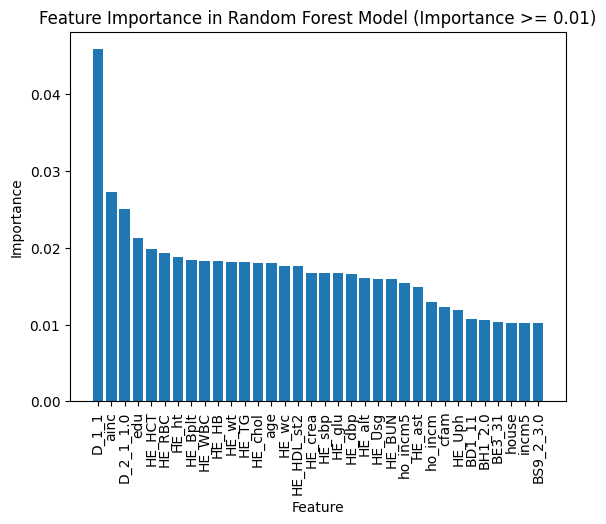

In [10]:
# 사용 모델
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)

model.fit(X_over, y_over)

# Feature 중요도 계산
feature_importances = model.feature_importances_

# 중요도가 0.01 이상인 feature만 선택
selected_features = X_over.columns[feature_importances >= 0.01]

# 중요도를 DataFrame으로 변환
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_over.columns,
    'Importance': feature_importances
})

# Feature 중요도 시각화
selected_idx = np.argsort(feature_importances[feature_importances >= 0.01])[::-1]

plt.bar(range(len(selected_features)), feature_importances[feature_importances >= 0.01][selected_idx], align="center")
plt.xticks(range(len(selected_features)), selected_features[selected_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model (Importance >= 0.01)")
plt.show()

In [11]:
rf_feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
29,D_1_1,0.045815
1,ainc,0.027275
117,D_2_1_1.0,0.025034
26,edu,0.021234
14,HE_HCT,0.019845
18,HE_RBC,0.019349
4,HE_ht,0.018747
19,HE_Bplt,0.018378
17,HE_WBC,0.018305
13,HE_HB,0.018217


간단한 실험용 MLP를 이용해서 feature importance 구해보기

In [12]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

ann_model = MLPClassifier(hidden_layer_sizes=(32,), 
                          max_iter=100, 
                          random_state=2023, 
                          solver='adam',
                          batch_size=32,
                          learning_rate='constant',)
ann_model.fit(X_train, y_train)

# permutation feature importance 계산
result = permutation_importance(ann_model, X_test, y_test, n_repeats=30, random_state=42)

# 중요도 및 관련 정보를 DataFrame으로 변환
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
})

# 중요도를 기준으로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance_Mean', ascending=False)

# 결과 출력
feature_importance_df

# 결과 출력
# print("Permutation Feature Importance:")
# for i, imp in enumerate(result.importances_mean):
#     print(f"Feature {i}: {imp}")


In [ ]:
feature_importance_df.head()

,Feature,Importance_Mean,Importance_Std
146,BO2_1_1.0,0.027115,0.002617
200,BO1_4.0,0.024260,0.002997
149,BO2_1_4.0,0.023695,0.002806
199,BO1_3.0,0.019556,0.003153
75,educ_3.0,0.018780,0.001922


In [ ]:
sort_importance = sorted(result.importances_mean,reverse=True)
sort_importance

[0.027114752063551205,
 0.024259914354868777,
 0.02369515298206421,
 0.019555638304474692,
 0.018779867187984894,
 0.018426115558865547,
 0.01826475516663567,
 0.01782411717246947,
 0.015620927201638471,
 0.015409917457953245,
 0.014975485632718966,
 0.014677589523986874,
 0.014590703158940033,
 0.014081797306522719,
 0.013864581393905577,
 0.0137032210016757,
 0.012964686898777422,
 0.012790914168683705,
 0.012704027803636863,
 0.012461987215292047,
 0.012430956370632455,
 0.011835164153168294,
 0.011593123564823478,
 0.010947681995903964,
 0.010624961211444203,
 0.01038912679203131,
 0.009892633277477835,
 0.009650592689133035,
 0.00922236703283067,
 0.009110655992056137,
 0.008657605660026095,
 0.008651399491094188,
 0.008396946564885524,
 0.008390740395953607,
 0.008334884875566335,
 0.008310060199838664,
 0.007317073170731751,
 0.006932290696952807,
 0.0067150747843356656,
 0.006398560168807825,
 0.006299261465897132,
 0.006255818283373693,
 0.006156519580463012,
 0.00595792217464

### 결론
- Random Forest를 이용하여 학습시 영향 많이 주는 속성은 없음 아마 ANN에 사용한 feature를 그대로 사용하다 보니 이렇게 된것 같다
- Kfold를 사용할때 왜 score가 점점 증가하는지 이유를 모르겠습니다.


추가로 Heatmap 분석한 부분입니다.

train_X_df의 각 feature들의 상관관계를 분석하고 depressed와 얼마나 연관이 있는지 봅니다.

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})

In [ ]:
df_new = X_over

## numerical features의 상관관계

- 사용 features

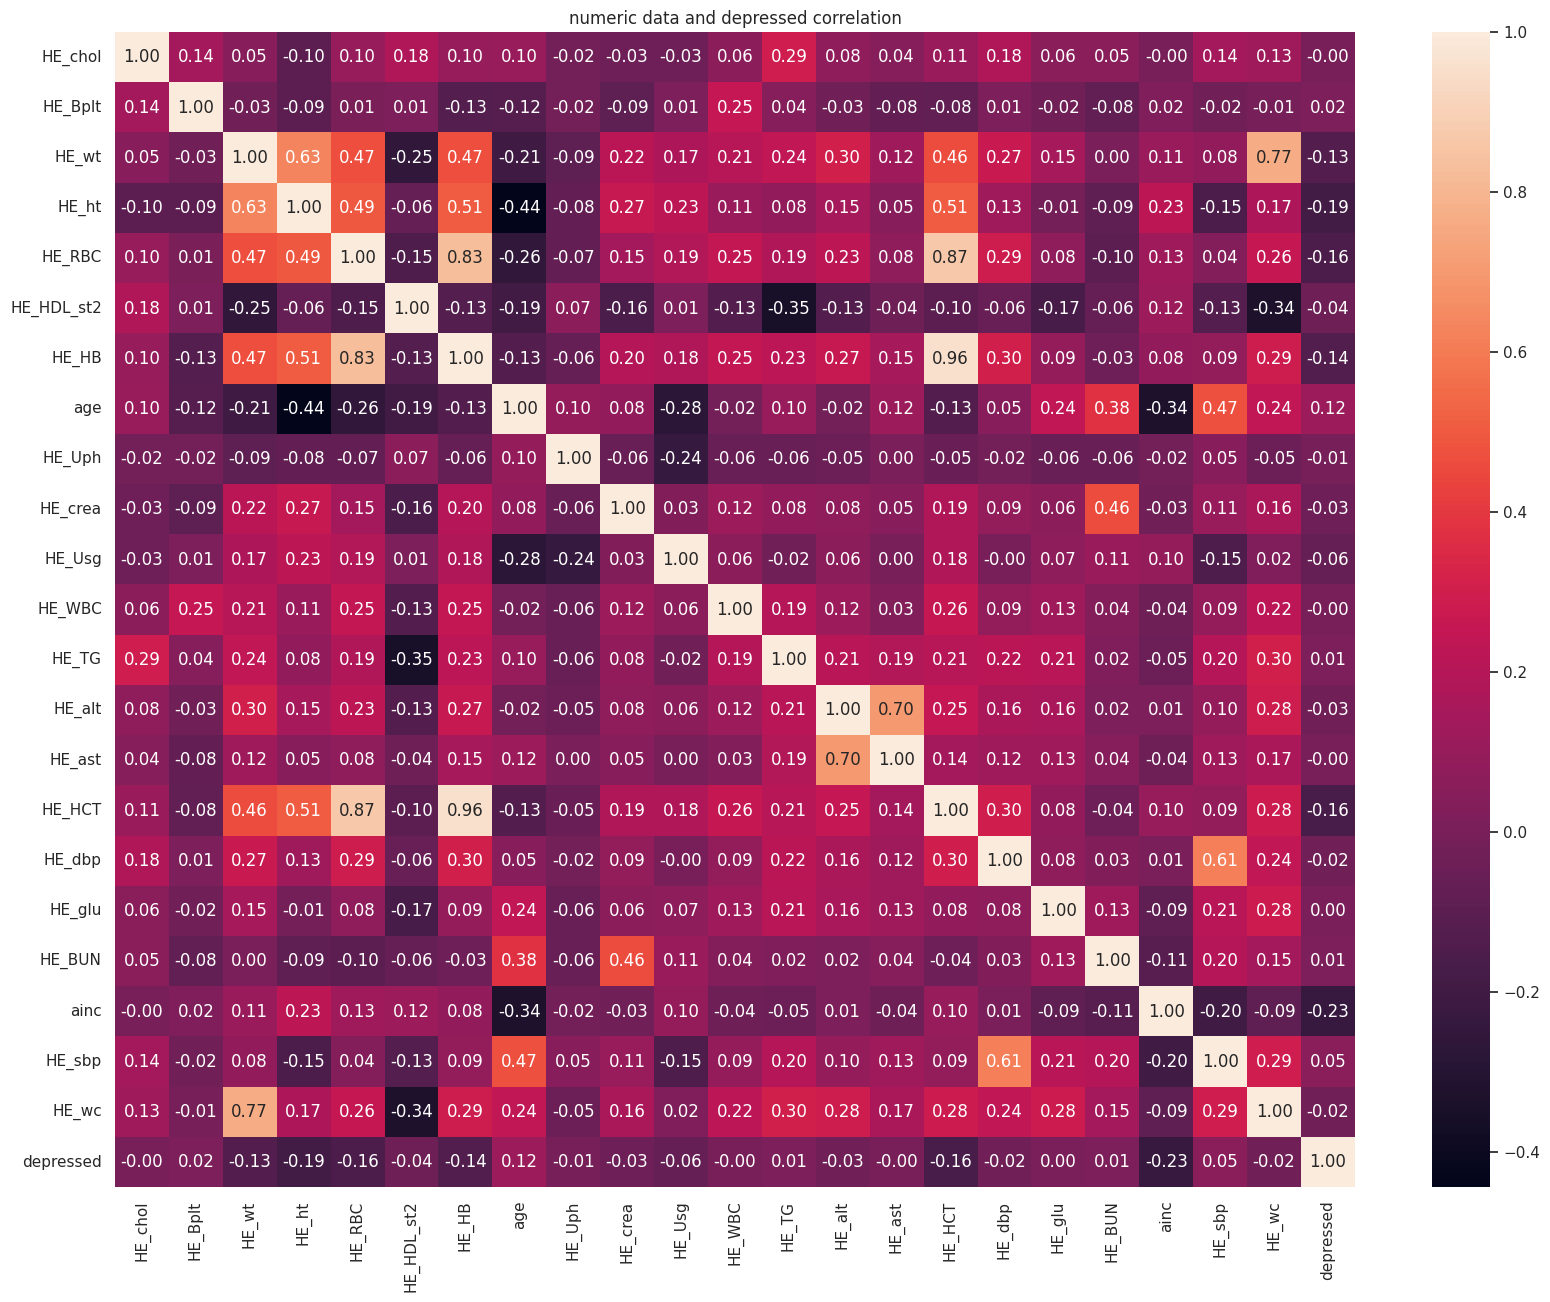

In [ ]:
df_num = pd.concat([df_new[num_features],y_over], axis=1)
sns.heatmap(df_num.corr(), annot=True, fmt='.2f')
plt.title("numeric data and depressed correlation")
plt.show()

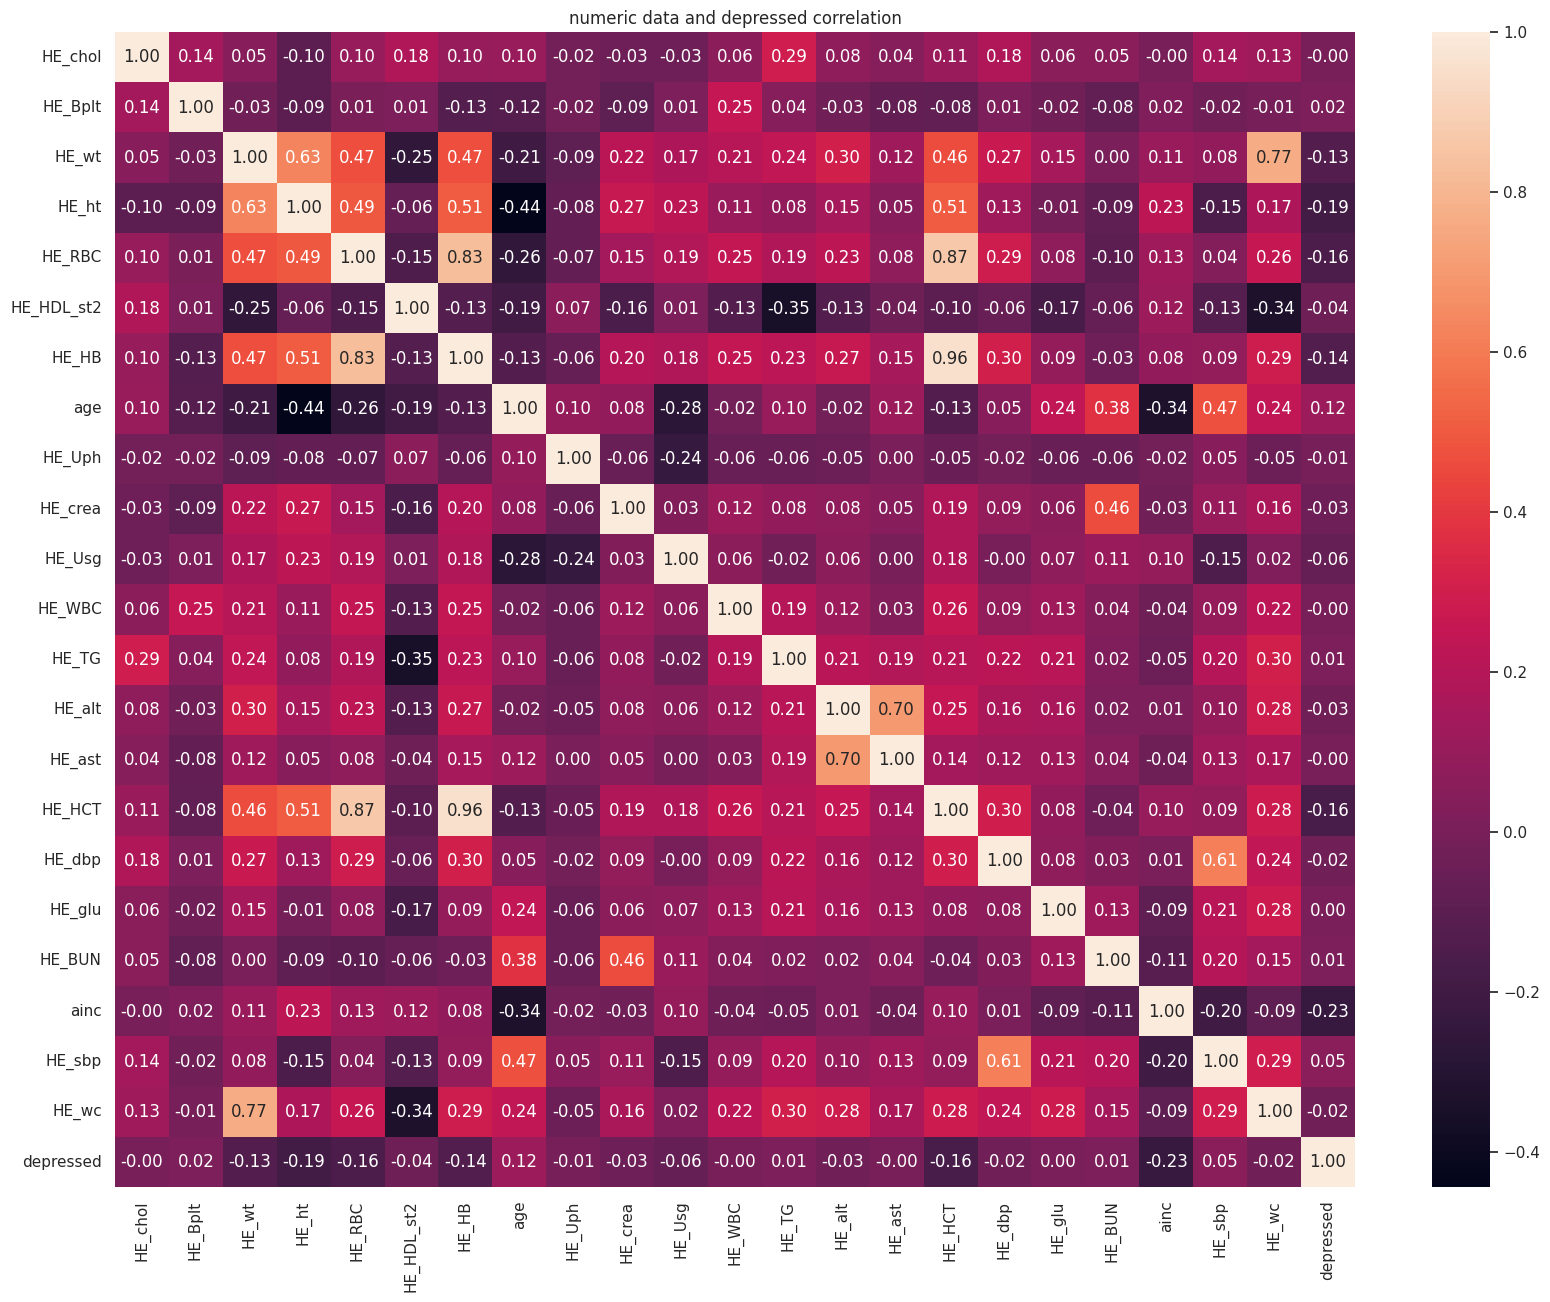

In [ ]:
df_num = pd.concat([df_new[num_features],y_over], axis=1)
sns.heatmap(df_num.corr(), annot=True, fmt='.2f')
plt.title("numeric data and depressed correlation")
plt.show()

## label features의 상관관계

- 사용 features

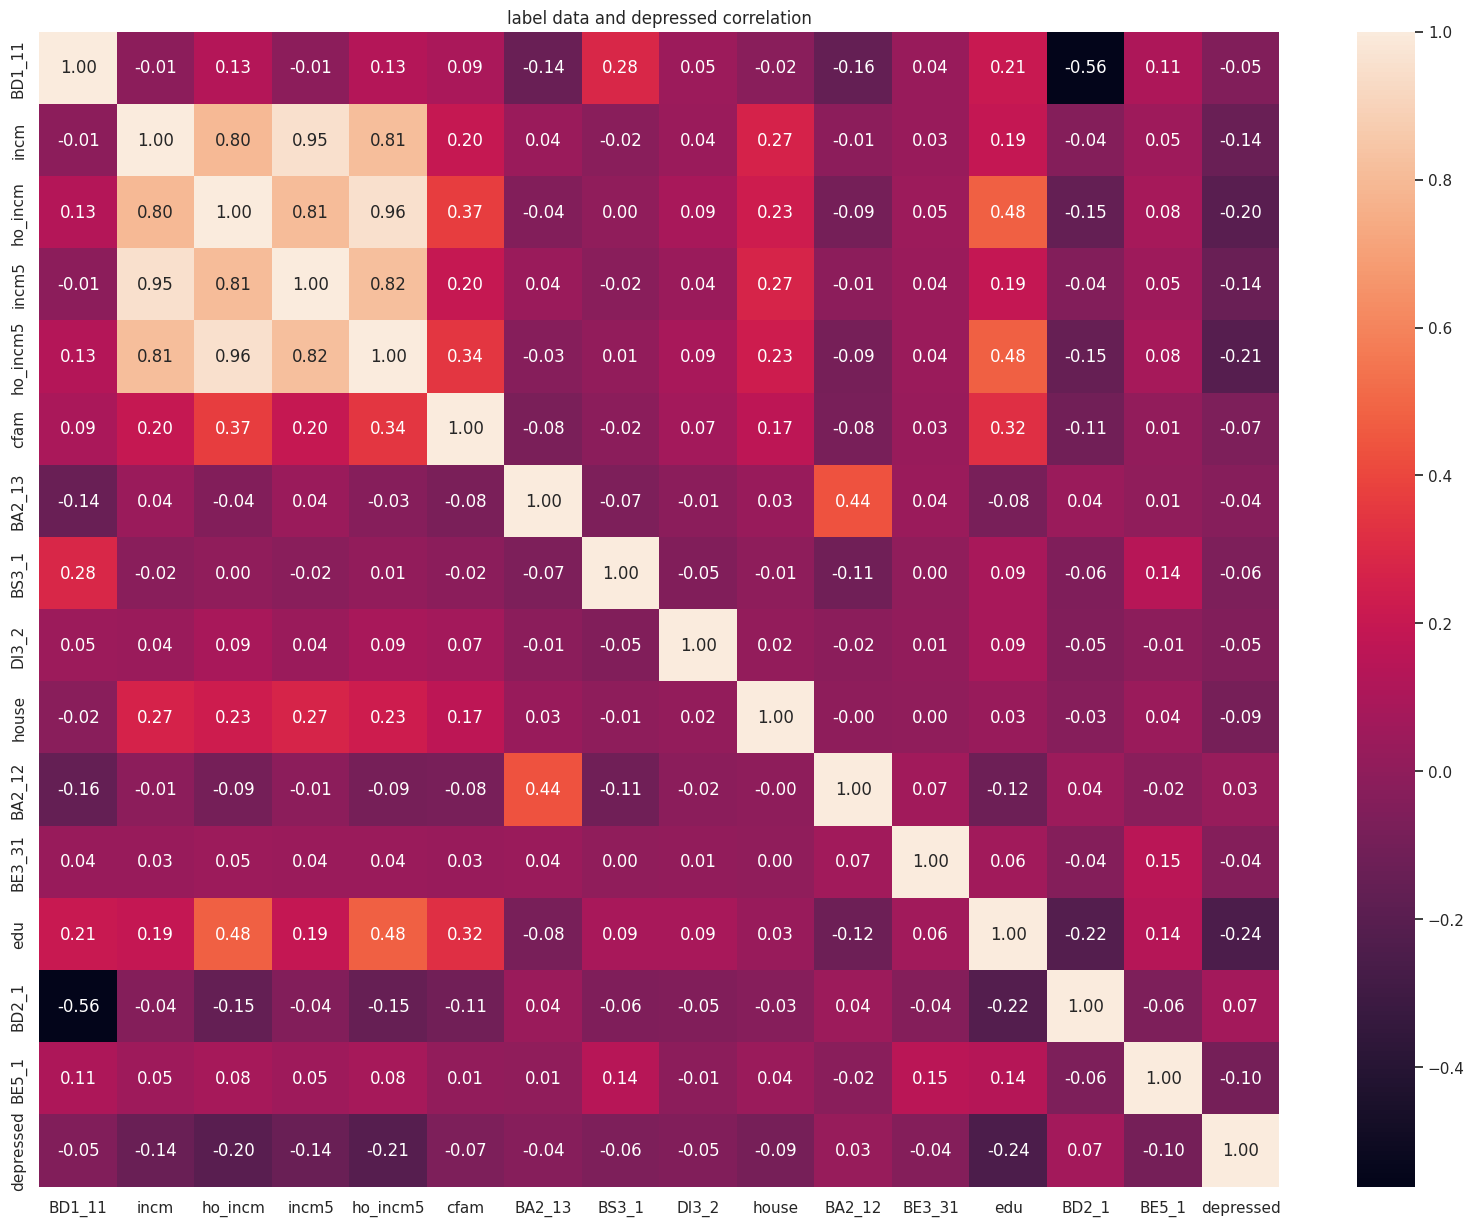

In [ ]:
df_label = pd.concat([df_new[label_features],y_over], axis=1)
sns.heatmap(df_label.corr(), annot=True, fmt='.2f')
plt.title("label data and depressed correlation")
plt.show()

## OneHot Features의 상관관계

- 사용 features

In [ ]:
df_onehot = df_new.drop(num_features+label_features, axis=1)
df_onehot = pd.concat([df_onehot,y_over],axis=1)

- 상관관계가 0.15보다 높은 값만 선택합니다.

In [ ]:
correlation_matrix = df_onehot.corr()
threshold = 0.15

relevant_corr = correlation_matrix['depressed'][correlation_matrix['depressed'].abs() > threshold]

relevant_corr_matrix = df_onehot[relevant_corr.index].corr()

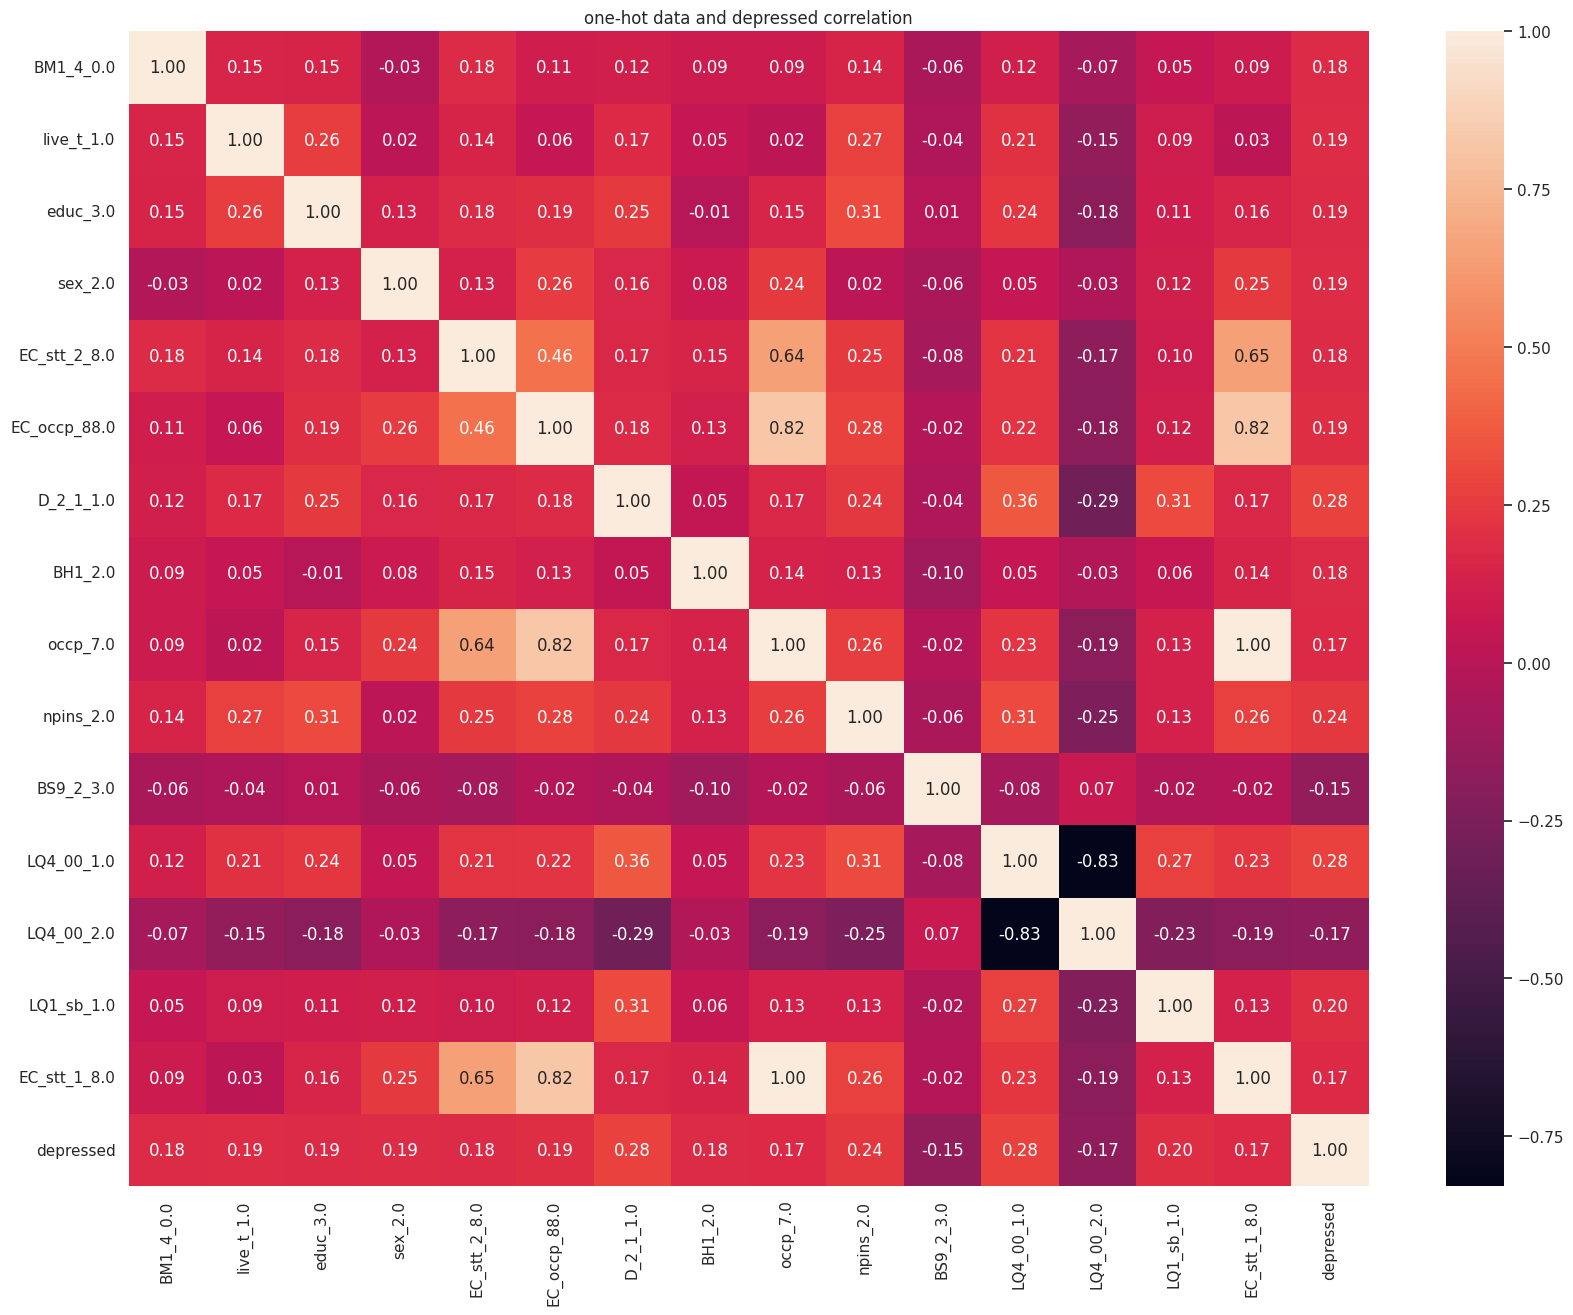

In [ ]:
# sns.set(rc={'figure.figsize':(25,20)})

sns.heatmap(relevant_corr_matrix, annot=True, fmt='.2f')
plt.title("one-hot data and depressed correlation")
plt.show()

depressed와 유의미하게 관계가 있는 features는 존재하지 않는것 같습니다. 따라서 머신러닝 모델에서는 성능이 그렇게 좋지는 않을 것으로 위 관계만 본다면 미리 예상 가능하고, 하지만 feature가 많은게 어떤 변수를 가져올지는 모르겠습니다.